In [3]:
import numpy as np

In [4]:
x = np.array([1, 2, 3])

In [5]:
x.__class__

numpy.ndarray

In [6]:
x.shape

(3,)

In [7]:
x.ndim

1

In [8]:
W = np.array([[1, 2, 3], [4, 5, 6]])

In [9]:
W.shape

(2, 3)

In [10]:
W.ndim

2

In [11]:
X = np.array([[0, 1, 2], [3, 4, 5]])

In [12]:
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [13]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [14]:
A = np.array([[1, 2], [3, 4]])

In [15]:
A * 10

array([[10, 20],
       [30, 40]])

In [16]:
b = np.array([10, 20])

In [17]:
A * b

array([[10, 40],
       [30, 80]])

In [18]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)

32

In [19]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [20]:
x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
h = np.dot(x, W1) + b1

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
a = sigmoid(h)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)
s = np.dot(a, W2) + b2

In [23]:
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [24]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out =  np.dot(x, W) + b
        return out

In [25]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [26]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [27]:
s

array([[ 1.41253245,  1.23626772, -0.66006657],
       [ 1.42077823,  1.34828707, -0.68365949],
       [ 1.2195969 ,  0.24211552,  0.06564369],
       [ 1.4157468 ,  1.21035209, -0.64834912],
       [ 1.56974471,  1.46442212, -0.6261179 ],
       [ 1.74038427,  1.0633172 , -0.12896688],
       [ 1.6982475 ,  0.71577   ,  0.37553981],
       [ 1.38219715,  1.15310797, -0.63985056],
       [ 1.28481878,  1.7045868 , -0.64483184],
       [ 1.30815038,  0.22093637,  0.21355608]])

In [28]:
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)
dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

In [116]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dw = np.dot(self.x.T, dout)
        self.grads[0][...] = dw
        return dx
    
class Sigmoid:
    def __init_(self):
        self.params, self.grads = [], []
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 * self.out) * self.out
        return dx

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros.like(W), np.zeros_like(b)]
        self.x = None
        
    def forward():
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
        

class SDG:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]
        

In [1]:
text = "You say goodbye and I say hello."
text = text.lower()
text = text.replace(".", " .")
text

'you say goodbye and i say hello .'

In [2]:
words = text.split(" ")
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [3]:
word2id = {}
id2word = {}
for word in words:
    if word not in word2id:
        new_id = len(word2id)
        word2id[word] = new_id
        id2word[new_id] = word

In [4]:
id2word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [6]:
import numpy as np
corpus = [word2id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [7]:
def preprocess(text):
    text = text.lower()
    text = text.replace(".", " .")
    words = text.split(" ")
    word2id = {}
    id2word = {}
    for word in words:
        if word not in word2id:
            new_id = len(word2id)
            word2id[word] = new_id
            id2word[new_id] = word
    corpus = [word2id[w] for w in words]
    corpus = np.array(corpus)
    return corpus, word2id, id2word

In [64]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - 1
            right_idx = idx + 1
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    
    return co_matrix

In [65]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x ** 2) + eps)
    ny = y / np.sqrt(np.sum(y ** 2) + eps)
    return np.dot(nx, ny)

In [66]:
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id["you"]]
c1 = C[word_to_id["i"]]

In [67]:
cos_similarity(c0, c1)

0.7071067758832467

In [72]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print("%s is not found" % query)
        return
    
    print("\n[query]" + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(" %s : %s" % (id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

In [73]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

In [74]:
most_similar("you", word_to_id, id_to_word, C, top=5)


[query]you
 goodbye : 0.7071067758832467
 i : 0.7071067758832467
 hello : 0.7071067758832467
 say : 0.0
 and : 0.0


In [95]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j] * S[i]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total / 100) == 0:
                    print("%.1f%% done" % (100 * cnt / total))
    return M

In [98]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

In [99]:
np.set_printoptions(precision=3)

In [101]:
print(W)

[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [104]:
import matplotlib.pyplot as plt

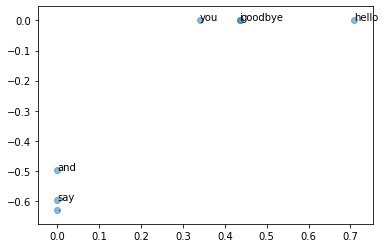

In [107]:
U, S, V = np.linalg.svd(W)
for w, wid in word_to_id.items():
    plt.annotate(w, (U[wid, 0], U[wid, 1]))
    
plt.scatter(U[:, 0], U[:,1], alpha=0.5)
plt.show()

In [108]:
import sys
sys.path.append(".")
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data("train")
print("corpus size: ", len(corpus))
print("corpus[:30]: ", corpus[:30])
print("id_to_word[0]: ", id_to_word[0])
print("id_to_word[1]: ", id_to_word[1])
print("id_to_word[2]: ", id_to_word[2])
key = "car"
print(f"word_to_id[{key}]", word_to_id[key])
key = "happy"
print(f"word_to_id[{key}]", word_to_id[key])
key = "lexus"
print(f"word_to_id[{key}]", word_to_id[key])

Done
corpus size:  929589
corpus[:30]:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
id_to_word[0]:  aer
id_to_word[1]:  banknote
id_to_word[2]:  berlitz
word_to_id[car] 3856
word_to_id[happy] 4428
word_to_id[lexus] 7426


In [109]:
window_size = 2
word_vec_size = 100

In [111]:
vocab_size = len(word_to_id)
print("counting co-occurrence")
C = create_co_matrix(corpus, vocab_size, window_size)
print("calculating PPMI")
W = ppmi(C, verbose=True)
print("calculating SVD")
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=word_vec_size, n_iter=5, random_state=None)
except ImportError:
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :word_vec_size]
querys = ["you", "year", "car", "toyota"]
for q in querys:
    most_similar(q, word_to_id, id_to_word, word_vecs, top=5)

counting co-occurrence
calculating PPMI
1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0% done
8

In [117]:
c0 = np.array([1, 0, 0, 0, 0, 0, 0])
c1 = np.array([0, 0, 1, 0, 0, 0, 0])

W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[ 1.331 -0.969  0.914  0.158 -2.213 -2.13  -0.079]


In [118]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus) - window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
    return np.array(contexts), np.array(target)

In [208]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size=1)

In [209]:
target
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [125]:
from common.util import convert_one_hot

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [126]:
target

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [134]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

In [132]:
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

In [136]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer0 = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
    
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        
        h = (h0 + h1) * 0.5
        
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        ds = self.out_layer.vackward(ds)
        ds *= 0.5
        self.in_layer0.backward(ds)
        self.in_layer1.backward(ds)
        return None

In [149]:
!ls ch03

cbow_predict.py  simple_cbow.py  simple_skip_gram.py  train.py


| epoch 1 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 2 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 3 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 4 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 5 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 6 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 7 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 8 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 9 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 10 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 11 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 12 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 13 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 14 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 15 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 16 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 17 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 18 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 19 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 20 |  iter 1 / 1 | time 0[s] | loss 1.79
| epoch 21 |  iter 1 / 1 | ti

| epoch 298 |  iter 1 / 1 | time 0[s] | loss 1.23
| epoch 299 |  iter 1 / 1 | time 0[s] | loss 1.20
| epoch 300 |  iter 1 / 1 | time 0[s] | loss 1.22
| epoch 301 |  iter 1 / 1 | time 0[s] | loss 1.24
| epoch 302 |  iter 1 / 1 | time 0[s] | loss 1.24
| epoch 303 |  iter 1 / 1 | time 0[s] | loss 1.23
| epoch 304 |  iter 1 / 1 | time 0[s] | loss 1.30
| epoch 305 |  iter 1 / 1 | time 0[s] | loss 1.29
| epoch 306 |  iter 1 / 1 | time 0[s] | loss 1.22
| epoch 307 |  iter 1 / 1 | time 0[s] | loss 1.28
| epoch 308 |  iter 1 / 1 | time 0[s] | loss 1.32
| epoch 309 |  iter 1 / 1 | time 0[s] | loss 1.27
| epoch 310 |  iter 1 / 1 | time 0[s] | loss 1.31
| epoch 311 |  iter 1 / 1 | time 0[s] | loss 1.23
| epoch 312 |  iter 1 / 1 | time 0[s] | loss 1.28
| epoch 313 |  iter 1 / 1 | time 0[s] | loss 1.31
| epoch 314 |  iter 1 / 1 | time 0[s] | loss 1.27
| epoch 315 |  iter 1 / 1 | time 0[s] | loss 1.28
| epoch 316 |  iter 1 / 1 | time 0[s] | loss 1.24
| epoch 317 |  iter 1 / 1 | time 0[s] | loss 1.24


| epoch 771 |  iter 1 / 1 | time 0[s] | loss 0.44
| epoch 772 |  iter 1 / 1 | time 0[s] | loss 0.63
| epoch 773 |  iter 1 / 1 | time 0[s] | loss 0.63
| epoch 774 |  iter 1 / 1 | time 0[s] | loss 0.59
| epoch 775 |  iter 1 / 1 | time 0[s] | loss 0.63
| epoch 776 |  iter 1 / 1 | time 0[s] | loss 0.44
| epoch 777 |  iter 1 / 1 | time 0[s] | loss 0.63
| epoch 778 |  iter 1 / 1 | time 0[s] | loss 0.59
| epoch 779 |  iter 1 / 1 | time 0[s] | loss 0.44
| epoch 780 |  iter 1 / 1 | time 0[s] | loss 0.44
| epoch 781 |  iter 1 / 1 | time 0[s] | loss 0.63
| epoch 782 |  iter 1 / 1 | time 0[s] | loss 0.62
| epoch 783 |  iter 1 / 1 | time 0[s] | loss 0.59
| epoch 784 |  iter 1 / 1 | time 0[s] | loss 0.44
| epoch 785 |  iter 1 / 1 | time 0[s] | loss 0.47
| epoch 786 |  iter 1 / 1 | time 0[s] | loss 0.62
| epoch 787 |  iter 1 / 1 | time 0[s] | loss 0.43
| epoch 788 |  iter 1 / 1 | time 0[s] | loss 0.62
| epoch 789 |  iter 1 / 1 | time 0[s] | loss 0.77
| epoch 790 |  iter 1 / 1 | time 0[s] | loss 0.43


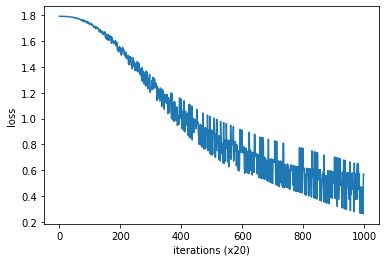

In [150]:
import sys
sys.path.append("ch03/")
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()


In [152]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-0.993 -0.769 -0.758  1.025 -0.78 ]
say [-0.865  0.849  0.834  0.847  0.841]
goodbye [ 0.225 -0.876 -0.868 -0.308 -0.879]
and [-0.859  0.862  0.841  0.86   0.846]
i [ 0.21  -0.843 -0.881 -0.303 -0.866]
hello [-0.998 -0.778 -0.769  1.028 -0.791]


In [156]:
cos_similarity(word_vecs[0], word_vecs[5])

0.9999876

In [157]:
cos_similarity(word_vecs[0], word_vecs[4])

0.4894311

In [159]:
import numpy as np
W = np.arange(21).reshape(7,3)
W

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20]])

In [160]:
idx = np.array([1, 0, 3, 0])
W[idx]

array([[ 3,  4,  5],
       [ 0,  1,  2],
       [ 9, 10, 11],
       [ 0,  1,  2]])

In [172]:
class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None
    
    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out
    
    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None

In [174]:
class EnbeddingDot:
    def __init__(self, W):
        self.embed = Embedding(W)
        self.params = self.embed.params
        self.grads = self.embed.grads
        self.cache = None
        
    def forward(self, h, idx):
        target_W = self.embed.forward(idx)
        out = np.sum(target_W * h, axis=1)
        
        self.cache = (h, target_W)
        return out
    
    def backward(self, dout):
        h, target_W = self.cache
        dout = dout.reshape(dout.shape[0], 1)
        dtarget_W = dout * h
        seld.embed.bachward(dtarget_W)
        dh = dout * target_W
        return dh

In [195]:
import numpy as np

np.random.choice(10)
words = [
    "you",
    "say",
    "goodbye",
    "I",
    "hello",
    "."
]
p = [0.5, 0.1, 0.05, 0.2, 0.05, 0.1]
np.random.choice(words, size=5, replace=False, p=p)

array(['I', '.', 'you', 'say', 'hello'], dtype='<U7')

In [196]:
p = [0.7, 0.29, 0.01]
new_p = np.power(p, 0.75)
new_p /= np.sum(new_p)
print(new_p)

[0.642 0.332 0.027]


In [204]:
import sys
sys.path.append('ch04')
from negative_sampling_layer import UnigramSampler
corpus = np.array([0, 1, 2, 3, 4, 1, 2, 3])
power = 0.75
sample_size = 2

sampler = UnigramSampler(corpus, power, sample_size)
target = np.array([1, 3, 0])
negative_sample = sampler.get_negative_sample(target)
print(negative_sample)

[[4 2]
 [2 0]
 [2 3]]


In [207]:
from common.layers import SigmoidWithLoss
class NegativeSampleingLoss:
    def __init__(self, W, corpus, power=0.75, sample_size=5):
        self.sapmle_size = sapmle_size
        self.sampler = UnigramSampler(corpus, power, sample_size)
        self.loss_layers = [SigmoidWithLoss() for _ in range(sample_size + 1)]
        self.embed_dot_layers = [EmbeddingDot(W) for _ in range(sample_size + 1)]
        
        self.params, self.grads = [], []
        for layer in self.embed_dot_layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, h, target):
        batch_size = target.shape[0]
        negative_sample = self.sampler.get_negative_sample(target)
        
        score = self.embed_dot_layer[0].forward(h, target)
        correct_label = np.ones(batch_size, dtype=np.int32)
        loss = self.loss_layers[0].forward(score, correct_label)
        
        negative_label = np.zeros(batch_size, dtype=np.int32)
        for i in range(self.sample_size):
            negative_target = negative_sample[:, i]
            score = self.embed_dot_layers[1 + i].forward(h, negative_target)
            loss += self.loss_layers[1 + i].forward(score, negative_label)
            
        return loss
    
    def backward(self, dout=1):
        dh = 0
        for l0, l1, in zip(self.loss_layers, self.embed_dot_layers):
            # forwardの逆
            dscore = l0.backward(dout)
            dh += l1.backward(dscore)
        
        return dh

In [ ]:
class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_seiz, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')
        
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)
        
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = 0
        for i layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss
    
    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None
    

In [212]:
import sys
sys.path.append(".")
import numpy as np
from common import config
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from cbow import CBOW
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb

In [217]:
window_size = 5
hidden_size = 100
batch = 100
max_epoch = 10

In [218]:
%%time
corpus, word_to_id, id_to_word = ptb.load_data("train")
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)


CPU times: user 4.11 s, sys: 148 ms, total: 4.26 s
Wall time: 4.26 s


In [219]:
%%time
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)


CPU times: user 532 ms, sys: 0 ns, total: 532 ms
Wall time: 528 ms


In [220]:
%%time
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()


| epoch 1 |  iter 1 / 309859 | time 0[s] | loss 4.16
| epoch 1 |  iter 21 / 309859 | time 0[s] | loss 4.16
| epoch 1 |  iter 41 / 309859 | time 1[s] | loss 4.16
| epoch 1 |  iter 61 / 309859 | time 1[s] | loss 4.16
| epoch 1 |  iter 81 / 309859 | time 2[s] | loss 4.16
| epoch 1 |  iter 101 / 309859 | time 2[s] | loss 4.16
| epoch 1 |  iter 121 / 309859 | time 3[s] | loss 4.16
| epoch 1 |  iter 141 / 309859 | time 3[s] | loss 4.15
| epoch 1 |  iter 161 / 309859 | time 4[s] | loss 4.15
| epoch 1 |  iter 181 / 309859 | time 4[s] | loss 4.15
| epoch 1 |  iter 201 / 309859 | time 5[s] | loss 4.15
| epoch 1 |  iter 221 / 309859 | time 5[s] | loss 4.14
| epoch 1 |  iter 241 / 309859 | time 6[s] | loss 4.14
| epoch 1 |  iter 261 / 309859 | time 7[s] | loss 4.11
| epoch 1 |  iter 281 / 309859 | time 7[s] | loss 4.11
| epoch 1 |  iter 301 / 309859 | time 8[s] | loss 4.09
| epoch 1 |  iter 321 / 309859 | time 8[s] | loss 4.06
| epoch 1 |  iter 341 / 309859 | time 9[s] | loss 4.06
| epoch 1 |  ite

| epoch 1 |  iter 2921 / 309859 | time 94[s] | loss 3.14
| epoch 1 |  iter 2941 / 309859 | time 95[s] | loss 2.70
| epoch 1 |  iter 2961 / 309859 | time 96[s] | loss 3.00
| epoch 1 |  iter 2981 / 309859 | time 97[s] | loss 2.72
| epoch 1 |  iter 3001 / 309859 | time 98[s] | loss 2.97
| epoch 1 |  iter 3021 / 309859 | time 98[s] | loss 2.85
| epoch 1 |  iter 3041 / 309859 | time 99[s] | loss 2.91
| epoch 1 |  iter 3061 / 309859 | time 100[s] | loss 2.98
| epoch 1 |  iter 3081 / 309859 | time 101[s] | loss 3.04
| epoch 1 |  iter 3101 / 309859 | time 102[s] | loss 3.10
| epoch 1 |  iter 3121 / 309859 | time 102[s] | loss 3.09
| epoch 1 |  iter 3141 / 309859 | time 103[s] | loss 2.95
| epoch 1 |  iter 3161 / 309859 | time 104[s] | loss 3.03
| epoch 1 |  iter 3181 / 309859 | time 105[s] | loss 2.98
| epoch 1 |  iter 3201 / 309859 | time 106[s] | loss 2.94
| epoch 1 |  iter 3221 / 309859 | time 106[s] | loss 2.91
| epoch 1 |  iter 3241 / 309859 | time 107[s] | loss 2.95
| epoch 1 |  iter 326

| epoch 1 |  iter 5761 / 309859 | time 214[s] | loss 2.75
| epoch 1 |  iter 5781 / 309859 | time 214[s] | loss 2.80
| epoch 1 |  iter 5801 / 309859 | time 215[s] | loss 2.83
| epoch 1 |  iter 5821 / 309859 | time 216[s] | loss 2.70
| epoch 1 |  iter 5841 / 309859 | time 217[s] | loss 2.87
| epoch 1 |  iter 5861 / 309859 | time 218[s] | loss 2.63
| epoch 1 |  iter 5881 / 309859 | time 219[s] | loss 2.66
| epoch 1 |  iter 5901 / 309859 | time 220[s] | loss 2.87
| epoch 1 |  iter 5921 / 309859 | time 221[s] | loss 2.77
| epoch 1 |  iter 5941 / 309859 | time 221[s] | loss 2.63
| epoch 1 |  iter 5961 / 309859 | time 222[s] | loss 2.91
| epoch 1 |  iter 5981 / 309859 | time 223[s] | loss 2.68
| epoch 1 |  iter 6001 / 309859 | time 224[s] | loss 2.86
| epoch 1 |  iter 6021 / 309859 | time 225[s] | loss 2.78
| epoch 1 |  iter 6041 / 309859 | time 226[s] | loss 2.90
| epoch 1 |  iter 6061 / 309859 | time 227[s] | loss 2.68
| epoch 1 |  iter 6081 / 309859 | time 228[s] | loss 2.82
| epoch 1 |  i

| epoch 1 |  iter 8601 / 309859 | time 341[s] | loss 2.71
| epoch 1 |  iter 8621 / 309859 | time 342[s] | loss 2.64
| epoch 1 |  iter 8641 / 309859 | time 343[s] | loss 2.65
| epoch 1 |  iter 8661 / 309859 | time 344[s] | loss 2.78
| epoch 1 |  iter 8681 / 309859 | time 345[s] | loss 2.69
| epoch 1 |  iter 8701 / 309859 | time 346[s] | loss 2.65
| epoch 1 |  iter 8721 / 309859 | time 347[s] | loss 2.69
| epoch 1 |  iter 8741 / 309859 | time 348[s] | loss 2.80
| epoch 1 |  iter 8761 / 309859 | time 349[s] | loss 2.77
| epoch 1 |  iter 8781 / 309859 | time 349[s] | loss 2.62
| epoch 1 |  iter 8801 / 309859 | time 350[s] | loss 2.58
| epoch 1 |  iter 8821 / 309859 | time 351[s] | loss 2.66
| epoch 1 |  iter 8841 / 309859 | time 352[s] | loss 2.65
| epoch 1 |  iter 8861 / 309859 | time 353[s] | loss 2.91
| epoch 1 |  iter 8881 / 309859 | time 354[s] | loss 2.68
| epoch 1 |  iter 8901 / 309859 | time 355[s] | loss 2.60
| epoch 1 |  iter 8921 / 309859 | time 356[s] | loss 2.84
| epoch 1 |  i

| epoch 1 |  iter 11421 / 309859 | time 472[s] | loss 2.80
| epoch 1 |  iter 11441 / 309859 | time 473[s] | loss 2.70
| epoch 1 |  iter 11461 / 309859 | time 474[s] | loss 2.56
| epoch 1 |  iter 11481 / 309859 | time 475[s] | loss 2.59
| epoch 1 |  iter 11501 / 309859 | time 476[s] | loss 2.70
| epoch 1 |  iter 11521 / 309859 | time 477[s] | loss 2.68
| epoch 1 |  iter 11541 / 309859 | time 478[s] | loss 2.48
| epoch 1 |  iter 11561 / 309859 | time 479[s] | loss 2.59
| epoch 1 |  iter 11581 / 309859 | time 479[s] | loss 2.60
| epoch 1 |  iter 11601 / 309859 | time 480[s] | loss 2.70
| epoch 1 |  iter 11621 / 309859 | time 481[s] | loss 2.57
| epoch 1 |  iter 11641 / 309859 | time 482[s] | loss 2.58
| epoch 1 |  iter 11661 / 309859 | time 483[s] | loss 2.53
| epoch 1 |  iter 11681 / 309859 | time 484[s] | loss 2.57
| epoch 1 |  iter 11701 / 309859 | time 485[s] | loss 2.53
| epoch 1 |  iter 11721 / 309859 | time 486[s] | loss 2.65
| epoch 1 |  iter 11741 / 309859 | time 487[s] | loss 2.

| epoch 1 |  iter 14201 / 309859 | time 602[s] | loss 2.84
| epoch 1 |  iter 14221 / 309859 | time 603[s] | loss 2.69
| epoch 1 |  iter 14241 / 309859 | time 604[s] | loss 2.66
| epoch 1 |  iter 14261 / 309859 | time 605[s] | loss 2.57
| epoch 1 |  iter 14281 / 309859 | time 606[s] | loss 2.75
| epoch 1 |  iter 14301 / 309859 | time 607[s] | loss 2.59
| epoch 1 |  iter 14321 / 309859 | time 608[s] | loss 2.70
| epoch 1 |  iter 14341 / 309859 | time 608[s] | loss 2.60
| epoch 1 |  iter 14361 / 309859 | time 609[s] | loss 2.53
| epoch 1 |  iter 14381 / 309859 | time 610[s] | loss 2.53
| epoch 1 |  iter 14401 / 309859 | time 611[s] | loss 2.51
| epoch 1 |  iter 14421 / 309859 | time 612[s] | loss 2.72
| epoch 1 |  iter 14441 / 309859 | time 613[s] | loss 2.56
| epoch 1 |  iter 14461 / 309859 | time 614[s] | loss 2.48
| epoch 1 |  iter 14481 / 309859 | time 615[s] | loss 2.56
| epoch 1 |  iter 14501 / 309859 | time 616[s] | loss 2.80
| epoch 1 |  iter 14521 / 309859 | time 617[s] | loss 2.

| epoch 1 |  iter 16981 / 309859 | time 733[s] | loss 2.55
| epoch 1 |  iter 17001 / 309859 | time 734[s] | loss 2.50
| epoch 1 |  iter 17021 / 309859 | time 735[s] | loss 2.71
| epoch 1 |  iter 17041 / 309859 | time 736[s] | loss 2.60
| epoch 1 |  iter 17061 / 309859 | time 737[s] | loss 2.36
| epoch 1 |  iter 17081 / 309859 | time 738[s] | loss 2.60
| epoch 1 |  iter 17101 / 309859 | time 739[s] | loss 2.62
| epoch 1 |  iter 17121 / 309859 | time 740[s] | loss 2.59
| epoch 1 |  iter 17141 / 309859 | time 741[s] | loss 2.25
| epoch 1 |  iter 17161 / 309859 | time 742[s] | loss 2.42
| epoch 1 |  iter 17181 / 309859 | time 743[s] | loss 2.58
| epoch 1 |  iter 17201 / 309859 | time 744[s] | loss 2.59
| epoch 1 |  iter 17221 / 309859 | time 744[s] | loss 2.38
| epoch 1 |  iter 17241 / 309859 | time 745[s] | loss 2.44
| epoch 1 |  iter 17261 / 309859 | time 746[s] | loss 2.42
| epoch 1 |  iter 17281 / 309859 | time 747[s] | loss 2.64
| epoch 1 |  iter 17301 / 309859 | time 748[s] | loss 2.

KeyboardInterrupt: 

In [221]:
word_vecs = model.word_vecs

if config.GPU:
    word_vecs = to_cpu(word_vecs)

params = {}
params["word_vecs"] = word_vecs.astype(np.float16)
params["word_to_id"] = word_to_id
params["id_to_word"] = id_to_word
pkl_file = "cbow_params.pkl"
with open(pkl_file, "wb") as f:
    pickle.dump(params, f, -1)

In [233]:
import sys
sys.path.append(".")
from common.util import most_similar
import pickle

pkl_file = "cbow_params.pkl"

with open(pkl_file, "rb") as f:
    params = pickle.load(f)
    word_vecs = params["word_vecs"]
    word_to_id = params["word_to_id"]
    id_to_word = params["id_to_word"]
    
querys = ["we", "year", "car", "toyota", "actor"]
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] we
 i: 0.9599609375
 not: 0.94873046875
 you: 0.939453125
 us: 0.9365234375
 they: 0.93408203125

[query] year
 earlier: 0.95703125
 payment: 0.9482421875
 savings: 0.94580078125
 quarter: 0.9453125
 quarterly: 0.94140625

[query] car
 sharing: 0.9521484375
 devices: 0.95166015625
 reform: 0.95166015625
 computers: 0.94775390625
 cubic: 0.94775390625

[query] toyota
 speaking: 0.9619140625
 costa: 0.95947265625
 increases: 0.95703125
 dominant: 0.95556640625
 potential: 0.95458984375

[query] actor
 homes: 0.7587890625
 borough: 0.74365234375
 depends: 0.73876953125
 resembles: 0.7353515625
 ward: 0.72412109375


In [230]:
list(word_to_id.keys())[:100]

['aer',
 'banknote',
 'berlitz',
 'calloway',
 'centrust',
 'cluett',
 'fromstein',
 'gitano',
 'guterman',
 'hydro-quebec',
 'ipo',
 'kia',
 'memotec',
 'mlx',
 'nahb',
 'punts',
 'rake',
 'regatta',
 'rubens',
 'sim',
 'snack-food',
 'ssangyong',
 'swapo',
 'wachter',
 '<eos>',
 'pierre',
 '<unk>',
 'N',
 'years',
 'old',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'nov.',
 'mr.',
 'is',
 'chairman',
 'of',
 'n.v.',
 'dutch',
 'publishing',
 'group',
 'rudolph',
 'and',
 'former',
 'consolidated',
 'gold',
 'fields',
 'plc',
 'was',
 'named',
 'this',
 'british',
 'industrial',
 'conglomerate',
 'form',
 'asbestos',
 'once',
 'used',
 'to',
 'make',
 'kent',
 'cigarette',
 'filters',
 'has',
 'caused',
 'high',
 'percentage',
 'cancer',
 'deaths',
 'among',
 'workers',
 'exposed',
 'it',
 'more',
 'than',
 'ago',
 'researchers',
 'reported',
 'fiber',
 'unusually',
 'enters',
 'with',
 'even',
 'brief',
 'exposures',
 'causing',
 'symptoms',
 'that

In [234]:
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None
    
    def forward(self, x, h_prev):
        W, Wh, b = self.params
        t = np.dot(h_prev, Wh) + np.dot(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        return h_next
    
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.dot(h_prev.T, dt)
        dh_prev = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)
        
        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db
        
        return dx, dh_prev

In [236]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh ,b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        
        self.h, self.dh = None, None
        self.stateful = stateful
        
    def set_state(self, h):
        self.h = h
        
    def reset_state(self):
        self.h = None
        
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape
        
        self.layers = []
        hs = np.empty((N, T, H), dtype="f")
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype="f")
        
        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)
            
        return hs
    
    def backward(self, hds):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape
        
        dxs = np.empty((N, T, D), dtype="f")
        dh = 0
        grads = [0, 0, 0]
        for t in reserved(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx
            
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
            
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        
        return dxs
        

In [273]:
import sys
sys.path.append(".")
import numpy as np
from common.time_layers import *

class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H, = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 重みの初期値はXavier
        embed_W = (rn(V, D) / 100).astype("f")
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype("f")
        rnn_Wh = (rn(H, H) /np.sqrt(H)).astype("f")
        rnn_b = np.zeros(H).astype("f")
        affine_W = (rn(H, V) / np.sqrt(H)).astype("f")
        affine_b = np.zeros(V).astype("f")
        
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
    
    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    
    def reset_state(self):
        self.rnn_layer.reset_state()

In [288]:
import sys
sys.path.append("ch05")
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

In [300]:
batch_size = 10
wordvec_size = 100
hidden_size = 100
time_size = 5
lr = 0.1
max_epoch = 100

corpus, word_to_id, id_to_word = ptb.load_data("train")
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]
ts = corpus[1:]
data_size = len(xs)

print("corpus size: %d, voabulary size: %d" % (corpus_size, vocab_size))

max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SDG(lr)

jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

corpus size: 1000, voabulary size: 418


In [298]:
for epoch in range(max_epoch):
    for iter in range(max_iters):
        batch_x = np.empty((batch_size, time_size), dtype="i")
        batch_t = np.empty((batch_size, time_size), dtype="i")
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1
            
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1
        
    ppl = np.exp(total_loss / loss_count)
    print("epoch %d: perplexity % 2f" % (epoch + 1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

epoch 1: perplexity  412.407820
epoch 2: perplexity  338.076192
epoch 3: perplexity  245.017035
epoch 4: perplexity  226.395235
epoch 5: perplexity  213.271095
epoch 6: perplexity  205.762757
epoch 7: perplexity  199.759051
epoch 8: perplexity  197.623233
epoch 9: perplexity  192.503693
epoch 10: perplexity  192.834314
epoch 11: perplexity  188.809234
epoch 12: perplexity  191.150223
epoch 13: perplexity  189.574415
epoch 14: perplexity  189.276545
epoch 15: perplexity  188.298466
epoch 16: perplexity  184.628801
epoch 17: perplexity  182.103454
epoch 18: perplexity  178.902785
epoch 19: perplexity  179.522192
epoch 20: perplexity  180.142835
epoch 21: perplexity  177.570222
epoch 22: perplexity  173.069562
epoch 23: perplexity  169.960360
epoch 24: perplexity  170.533374
epoch 25: perplexity  167.159553
epoch 26: perplexity  168.384285
epoch 27: perplexity  161.359426
epoch 28: perplexity  158.754104
epoch 29: perplexity  155.262675
epoch 30: perplexity  149.163106
epoch 31: perplexit

In [37]:
import numpy as np
import matplotlib.pyplot as plt

out 0.3799489622552249
1 - out 0.6200510377447751
dout 0.6155367105916274
0.6211145579140391, 0.6142167059472478, 0.6227378381353121, 0.6121975849545578, 0.625214116975807, 0.609107307934162, 0.628988287421198, 0.6043737342869484, 0.6347323893040491, 0.5971147939683731, 0.6434539228241074, 0.5859670492022676, 0.6566426172491873, 0.5688204732121374, 0.6764432692547202, 0.5424245034799862, 0.7057756580244905, 0.5018807205400975, 0.7481157423501525, 0.44032283604788014, 0.8061158000547517, 0.35017731690208753, 0.877375846727255, 0.23021162357963232, 0.9470026083688297, 0.10318605974263306, 0.9893526370747897, 0.02118135951315947, 0.9995513500091743, 0.0008970986948372284, 0.9999991952139318, 1.609571488758732e-06, 0.9999999999974093, 5.1814108559256056e-12, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 

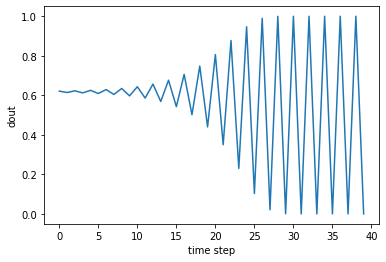

In [68]:
def bibun_tanh(y):
    return 1 - y * y

def get_tanh(x):
    return np.tanh(x)

def get_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bibun_sigmoid(x):
    return x - x * x

h = 0.4
out = get_sigmoid(h)
out = get_tanh(h)
print("out", out)
print("1 - out", 1 - out)
dout = bibun_sigmoid(1 - out)
dout = bibun_tanh(1 - out)
print("dout", dout)

dout_list = []
for i in range(40):
    dout = bibun_tanh(dout)
    dout_list.append(dout)
    print(dout, end=", ")
    
# グラフの描画
plt.plot(np.arange(len(dout_list)), dout_list)
# plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('dout')
plt.show()

[[ 1.78862847  0.43650985  0.09649747]
 [-1.8634927  -0.2773882  -0.35475898]
 [-0.08274148 -0.62700068 -0.04381817]]


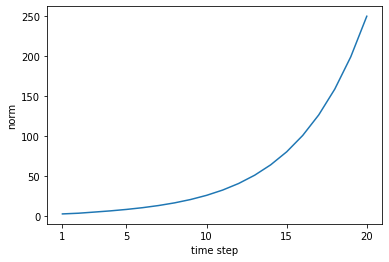

In [61]:
N = 2
H = 3
T = 20

dh = np.ones((N, H))
np.random.seed(3)
Wh = np.random.randn(H, H)
print(Wh)

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)
    norm = np.sqrt(np.sum(dh ** 2)) / N
    norm_list.append(norm)

# グラフの描画
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('norm')
plt.show()

[[ 0.89431424  0.21825493  0.04824873]
 [-0.93174635 -0.1386941  -0.17737949]
 [-0.04137074 -0.31350034 -0.02190908]]


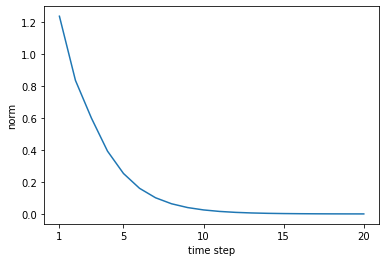

In [62]:
N = 2
H = 3
T = 20

dh = np.ones((N, H))
np.random.seed(3)
Wh = np.random.randn(H, H) * 0.5
print(Wh)

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)
    norm = np.sqrt(np.sum(dh ** 2)) / N
    norm_list.append(norm)

# グラフの描画
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('norm')
plt.show()

In [65]:
dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0

def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)
    
    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate
    
print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())

before: [9.75995422 6.72383676 9.02834109 8.45750871 3.77994041 0.92217009
 6.53410903 5.57840762 3.61564763]
after: [2.00518189 1.38141178 1.85487202 1.73759455 0.77658848 0.18945978
 1.34243223 1.14608344 0.74283454]


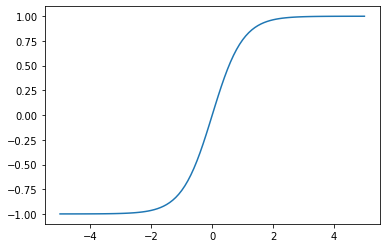

In [77]:
x = (np.arange(101) - 50) * 0.1
y = get_tanh(x)

plt.plot(x, y)
plt.show()

In [78]:
class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        
        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful
        
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]
        
        self.layers = []
        
        hs = np.empty((N, T, H), dtype="f")
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype="f")
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype="f")
        
        for t in range(T):
            layer = LSTM(*self, params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h
            
            self.layers.append(layer)
        
        return hs
    
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]
        
        dxs = np.empty((N, T, D), dtype="f")
        dh, dc = 0, 0
        
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :], + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
        
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
            
        self.dh = dh
        return dxs
    
    def set_state(self, h, c=None):
        self.h, self.c = h, c
        
    def reset_state(self):
        self.h, self.c = None, None

In [81]:
np.random.randn(5, 2) / 100

array([[ 0.01333738, -0.00197415],
       [ 0.01774645, -0.00674728],
       [ 0.00150617,  0.00152946],
       [-0.01064195,  0.00437947],
       [ 0.01938978, -0.01024931]])

In [85]:
import sys
sys.path.append("./ch06/")
from common.time_layers import *
import pickle

class Rnnlm:
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype("f")
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype("f")
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype("f")
        lstm_b = np.zeros(4 * H).astype("f")
        affine_W = (rn(H, V) / np.sqrt(H)).astype("f")
        affine_b = np.zeros(V).astype("f")
        
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.parms += layer.params
            self.grads += layer.grads
            
    def predict(self, xs):
        for layer in self.layers:
            xs = layers.forward(xs)
        return xs
    
    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, xs)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    
    def reset_state(self):
        self.lstm_layer.reset_state()
        
    def save_params(self, file_name="Rnnlm.pkl"):
        with open(file_name, "wb") as f:
            pickle_dump(self.params, f)
    
    def load_params(self, file_name="Rnnlm.pkl"):
        with open(file_name, "rb") as f:
            self.params = pickle.load(f)

| epoch 1 |  iter 1 / 1327 | time 0[s] | perplexity 9996.99
| epoch 1 |  iter 21 / 1327 | time 5[s] | perplexity 2771.43
| epoch 1 |  iter 41 / 1327 | time 10[s] | perplexity 1230.50
| epoch 1 |  iter 61 / 1327 | time 15[s] | perplexity 909.88
| epoch 1 |  iter 81 / 1327 | time 20[s] | perplexity 775.23
| epoch 1 |  iter 101 / 1327 | time 25[s] | perplexity 665.30
| epoch 1 |  iter 121 / 1327 | time 29[s] | perplexity 656.24
| epoch 1 |  iter 141 / 1327 | time 34[s] | perplexity 599.77
| epoch 1 |  iter 161 / 1327 | time 39[s] | perplexity 559.48
| epoch 1 |  iter 181 / 1327 | time 44[s] | perplexity 583.57
| epoch 1 |  iter 201 / 1327 | time 49[s] | perplexity 485.91
| epoch 1 |  iter 221 / 1327 | time 54[s] | perplexity 476.41
| epoch 1 |  iter 241 / 1327 | time 59[s] | perplexity 444.42
| epoch 1 |  iter 261 / 1327 | time 64[s] | perplexity 455.62
| epoch 1 |  iter 281 / 1327 | time 69[s] | perplexity 451.67
| epoch 1 |  iter 301 / 1327 | time 74[s] | perplexity 382.70
| epoch 1 |  

| epoch 2 |  iter 1281 / 1327 | time 648[s] | perplexity 122.18
| epoch 2 |  iter 1301 / 1327 | time 653[s] | perplexity 156.16
| epoch 2 |  iter 1321 / 1327 | time 658[s] | perplexity 153.66
| epoch 3 |  iter 1 / 1327 | time 660[s] | perplexity 164.19
| epoch 3 |  iter 21 / 1327 | time 665[s] | perplexity 143.80
| epoch 3 |  iter 41 / 1327 | time 669[s] | perplexity 135.81
| epoch 3 |  iter 61 / 1327 | time 674[s] | perplexity 127.05
| epoch 3 |  iter 81 / 1327 | time 679[s] | perplexity 117.02
| epoch 3 |  iter 101 / 1327 | time 684[s] | perplexity 105.77
| epoch 3 |  iter 121 / 1327 | time 689[s] | perplexity 115.57
| epoch 3 |  iter 141 / 1327 | time 694[s] | perplexity 125.57
| epoch 3 |  iter 161 / 1327 | time 700[s] | perplexity 142.56
| epoch 3 |  iter 181 / 1327 | time 705[s] | perplexity 149.44
| epoch 3 |  iter 201 / 1327 | time 709[s] | perplexity 139.47
| epoch 3 |  iter 221 / 1327 | time 714[s] | perplexity 139.98
| epoch 3 |  iter 241 / 1327 | time 719[s] | perplexity 13

| epoch 4 |  iter 1201 / 1327 | time 1289[s] | perplexity 83.86
| epoch 4 |  iter 1221 / 1327 | time 1293[s] | perplexity 75.74
| epoch 4 |  iter 1241 / 1327 | time 1298[s] | perplexity 90.56
| epoch 4 |  iter 1261 / 1327 | time 1303[s] | perplexity 94.33
| epoch 4 |  iter 1281 / 1327 | time 1308[s] | perplexity 89.53
| epoch 4 |  iter 1301 / 1327 | time 1313[s] | perplexity 110.53
| epoch 4 |  iter 1321 / 1327 | time 1318[s] | perplexity 110.87


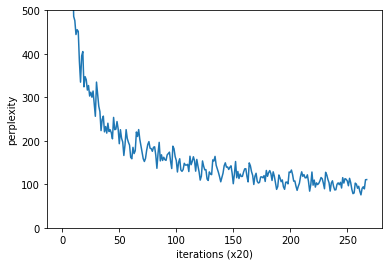

evaluating perplexity ...
234 / 235
test perplexity:  135.60008884320555
CPU times: user 1h 2min 33s, sys: 1h 27min 45s, total: 2h 30min 19s
Wall time: 22min 20s


In [3]:
%%time
import sys
sys.path.append("ch06/")
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from rnnlm import Rnnlm

batch_size = 20
wordvec_size = 100
hidden_size = 100
time_size = 35
lr = 20.0
max_epoch = 4
max_grad = 0.25

corpus, word_to_id, id_to_word = ptb.load_data("train")
corpus_test, _, _ = ptb.load_data("test")
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad, eval_interval=20)
trainer.plot(ylim=(0, 500))

model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print("test perplexity: ", ppl_test)

model.save_params()

In [5]:
import sys
sys.path.append("ch06")
from common.time_layers import *
from common.np import *
from common.base_model import BaseModel

class BetterRnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=650, hidden_size=650, dropout_ratio=0.5):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype("f")
        lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype("f")
        lstm_Wh1 = (rn(H, 4 * H) / np.sqrt(H)).astype("f")
        lstm_b1 = np.zeros(4 * H).astype("f")
        lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype("f")
        lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype("f")
        lstm_b2 = np.zeros(4 * H).astype("f")
        affine_b = np.zeros(V).astype("f")
        
        self.layers = [
            TimeEmbedding(embed_W),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful=True),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
            TimeDropout(dropout_ratio),
            # tying weight
            TimeAffine(embed_W.T, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layers = [self.layers[2], self.layers[4]]
        self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
        def predict(self, xs, train_flg=False):
            for layer in self.drop_layers:
                layer.train_flg = train_flg
            for layer in self.layers:
                xs = layer.forward(xs)
            return xs
        
        def forward(self, xs, ts, train_flg=True):
            score = self.predict(xs, train_flg)
            loss = self.loss_layer.forward(score, ts)
            return loss
        
        def backward(self, dout=1):
            dout = self.loss_layer.backward(dout)
            for layer in reversed(self.layers):
                dout = layer.backward(dout)
            return dout
        
        def reset_state(self):
            for layer in self.lstm_layers:
                layer.reset_state()

In [6]:
!wget https://www.oreilly.co.jp/pub/9784873118369/BetterRnnlm.pkl

--2020-01-29 08:10:22--  https://www.oreilly.co.jp/pub/9784873118369/BetterRnnlm.pkl
Resolving www.oreilly.co.jp (www.oreilly.co.jp)... 54.65.238.63, 54.65.169.31
Connecting to www.oreilly.co.jp (www.oreilly.co.jp)|54.65.238.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39550902 (38M)
Saving to: ‘BetterRnnlm.pkl’

BetterRnnlm.pkl     100%[===================>]  37.72M  31.9MB/s    in 1.2s    

2020-01-29 08:10:23 (31.9 MB/s) - ‘BetterRnnlm.pkl’ saved [39550902/39550902]



In [10]:
import sys
sys.path.append("ch06/")
from better_rnnlm import BetterRnnlm

wordvec_size = 650
hidden_size = 650
dropout = 0.5

corpus, word_to_id, id_to_word = ptb.load_data("train")
corpus_val, _, _ = ptb.load_data("val")
corpus_test, _, _ = ptb.load_data("test")
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]
model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
model.load_params("BetterRnnlm.pkl")
" ".join([id_to_word[i] for i in corpus[:300]])

"aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> pierre <unk> N years old will join the board as a nonexecutive director nov. N <eos> mr. <unk> is chairman of <unk> n.v. the dutch publishing group <eos> rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate <eos> a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than N years ago researchers reported <eos> the asbestos fiber <unk> is unusually <unk> once it enters the <unk> with even brief exposures to it causing symptoms that show up decades later researchers said <eos> <unk> inc. the unit of new york-based <unk> corp. that makes kent cigarettes stopped using <unk> in its <unk> cigarette filters in N <eos> altho